In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

with open('./output.pkl', 'rb') as f:
  data = pickle.load(f)

/home/nikhil/anaconda2/envs/rllab3_tcml/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


[[  -4.7894454    -2.27563071    2.66430426    7.88927364   -3.4885273 ]
 [ 348.46984863  171.90661621   62.02460098  239.954422    -17.99270439]]


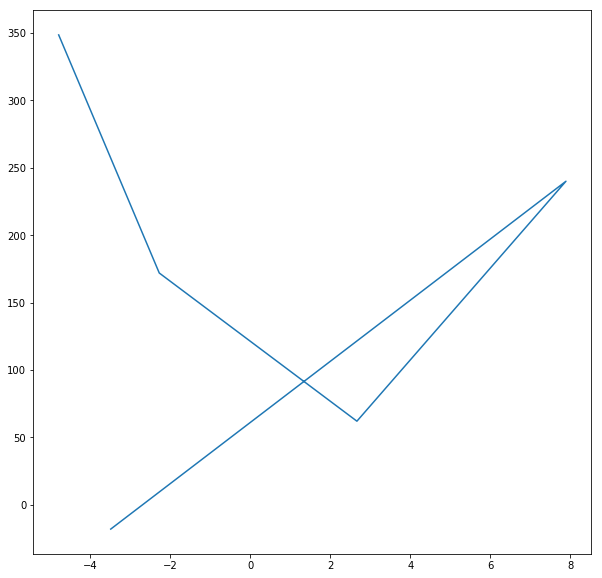

In [167]:
layers = [1, 3, 4]
iters = [0, 10, 20, 1000, 9000]

def rotate(x, y):
  th = np.pi/4
  c, s = np.cos(th), np.sin(th)
  R = np.array([[c, -s, 0], 
                [s,  c, 0]]).T
  xy1 = np.stack([x, y, np.ones_like(x)], axis=1)
  xy_rot = xy1.dot(R)
  return xy_rot[:, 0], xy_rot[:, 1]

plt.figure(figsize=(10, 10))
xy = []
for layer in layers[:1]:
  I_ty = [data['itr%d_layer%d' % (i, layer)]['mi'] for i in iters]
  I_tx = [data['itr%d_layer%d' % (i, layer)]['nll'] for i in iters]
  xy.append(np.stack([I_tx, I_ty]))

Z = np.concatenate(xy, axis=1)
mu = Z.mean(1, keepdims=True)
Z -= mu
cov = Z.dot(Z.T) / Z.shape[1]
L, V = np.linalg.eig(cov)
D = np.diag(L)

for i, pts in enumerate(xy):
  rot = np.linalg.inv(D).dot(V.T.dot(pts - mu))
  plt.plot(*rot, 
           label=str(layers[i]))
  print(rot)

In [158]:
mu.shape

(15,)